20180634_최준혁_과제3번

In [1]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pandas import read_excel
import statsmodels.tsa.vector_ar.var_model as smvar
from statsmodels.tsa.api import VAR #, DynamicVAR

In [2]:
excel_data= read_excel('국내총생산에_대한_지출_원계열__실질__분기__20190504163223.xlsx', '데이터')
data = excel_data.copy()
data

C:\Users\chris\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,"국내총생산에 대한 지출(원계열, 실질, 분기 및 연간)별",2000 1/4,2000 2/4,2000 3/4,2000 4/4,2001 1/4,2001 2/4,2001 3/4,2001 4/4,2002 1/4,...,2016 4/4,2017 1/4,2017 2/4,2017 3/4,2017 4/4,2018 1/4,2018 2/4,2018 3/4,2018 4/4,2019 1/4
0,최종소비지출,141448.1,137589.6,140616.2,146802.0,145599.9,145141.3,149782.0,158641.3,160945.1,...,241697.2,240085.9,238005.1,245128.8,250264.0,249767.8,245956.9,252527.1,259358.5,256463.1
1,민간,114788.2,110820.1,112953.9,117553.3,117998.0,116952.5,119953.0,127119.8,131147.3,...,184490.7,185828.0,180992.2,186778.4,190685.9,192356.2,186147.4,191461.3,195452.5,196000.5
2,가계,111735.8,107909.9,109993.1,114791.8,114723.0,113829.4,116774.3,124180.4,127507.8,...,176111.1,176344.7,172441.7,177493.6,182215.7,182036.7,177362.9,181930.9,186666.7,185881.1
3,가계에 봉사하는 비영리단체,3022.2,2877.2,2926.7,2692.2,3256.5,3092.7,3145.2,2862.1,3618.4,...,8386.6,9488.2,8558.2,9290.8,8480.7,10325.2,8792.1,9537.3,8794.6,10128.8
4,정부,26437.1,26702.0,27647.4,29299.0,27426.7,28111.4,29855.7,31539.5,29592.0,...,57179.3,54281.3,56968.3,58312.2,59538.9,57434.6,59718.8,60984.6,63781.4,60445.3
5,총자본형성,63385.6,75929.1,76956.9,73464.5,61724.2,76061.2,76076.8,79365.0,62884.3,...,133769.1,120572.9,138202.9,134780.1,143814.0,125571.5,136320.9,126925.8,138377.4,116524.6
6,총고정자본형성,60856.9,73084.0,73763.2,75720.1,61098.8,72298.4,74144.8,80220.9,64886.5,...,125717.4,107792.9,130242.1,128404.1,132036.9,111750.8,128569.3,119957.1,127019.9,102377.0
7,총고정자본형성(민간),52900.2,58677.0,59419.2,59237.0,52681.5,57934.4,58892.1,63302.2,56617.6,...,105830.1,96981.8,113403.4,107844.3,110656.2,101174.7,111223.6,100738.0,103779.4,91990.4
8,총고정자본형성(정부),7828.2,14521.6,14448.9,16688.2,8130.4,14531.0,15484.0,17216.8,8024.5,...,19864.2,11044.9,16968.3,20527.1,21337.5,10874.8,17447.9,19173.0,23057.0,10663.1
9,건설투자,30156.4,44279.9,42209.4,45267.7,30735.9,44999.1,46570.6,50072.0,34085.0,...,65086.1,49486.9,67059.8,66978.9,67552.9,50355.4,66069.9,61017.2,63553.9,46608.3


### Estimate the VAR(4) model for the growth rates of GDP, capital formation, private consumption and export using the excel data uploaded in the class webpage.

In [3]:
gdp= data.iloc[20,1:]
cap_form = data.iloc[5,1:]
priv_cons= data.iloc[1,1:]
export= data.iloc[13,1:]

In [4]:
gdp_gr= gdp.pct_change(periods=4)
cap_form_gr =cap_form.pct_change(periods=4)
priv_cons_gr=priv_cons.pct_change(periods=4)
export_gr=export.pct_change(periods=4)

In [5]:
x=pd.DataFrame({'gdp_gr' : gdp_gr[4:],'cap_form_gr' : cap_form_gr[4:],'priv_cons_gr':priv_cons_gr[4:],'export_gr': export_gr[4:]})

In [6]:
# Automatic VAR estimation
model = VAR(x)
results=model.fit(4,trend='c')
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 30, Oct, 2022
Time:                     18:49:47
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -28.9672
Nobs:                     69.0000    HQIC:                  -30.2955
Log likelihood:           751.702    FPE:                3.03019e-14
AIC:                     -31.1690    Det(Omega_mle):     1.25566e-14
--------------------------------------------------------------------
Results for equation gdp_gr
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                   0.013493         0.005545            2.434           0.015
L1.gdp_gr               0.876266         0.285992            3.064           0.002
L1.cap_form_gr         -0.042874         0.026957  

C:\Users\chris\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [7]:
order=model.select_order(maxlags=4)
print(order)

<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 4, BIC -> 1, FPE -> 4, HQIC ->  1>


### Does  capital  formation  Granger-cause  GDP?

In [8]:
gctest=results.test_causality('gdp_gr', 'cap_form_gr', kind='wald') # kind is either F-test ('f) or Wald test 'wald'
gctest.summary()

Test statistic,Critical value,p-value,df
5.068,9.488,0.280,4


ans : p-value가 0.280이므로 귀무가설 기각 실패 -> cause하지 않음

### Perform  impulse  response  analysis  for  all  the  series.

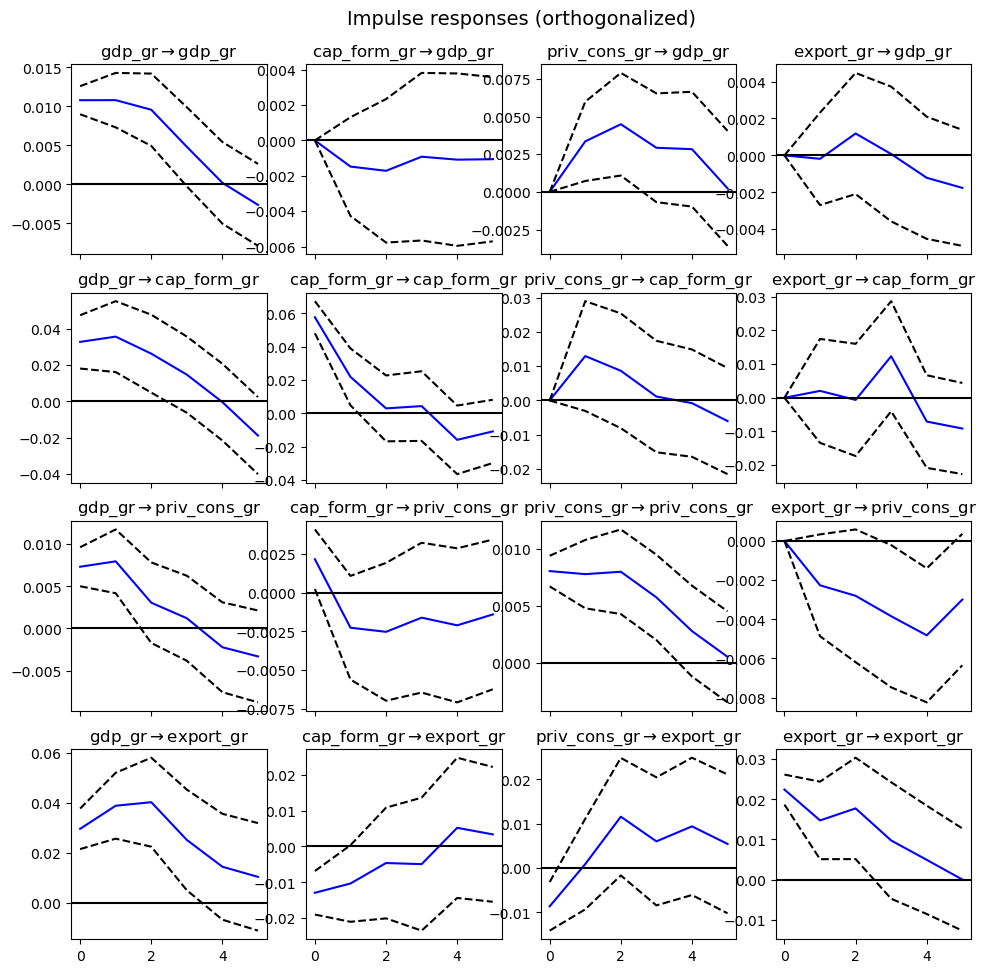

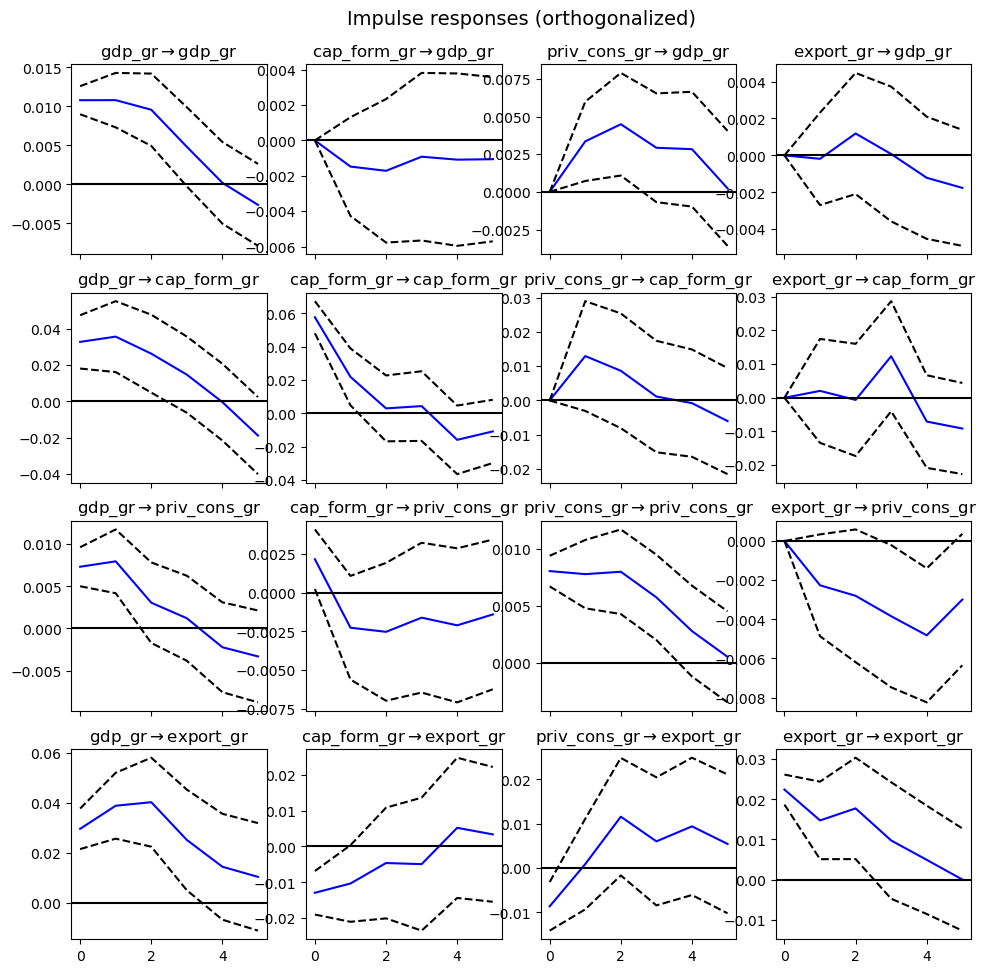

In [9]:
# Impulse response plot
irf = results.irf(5)
irf.plot(orth=True)

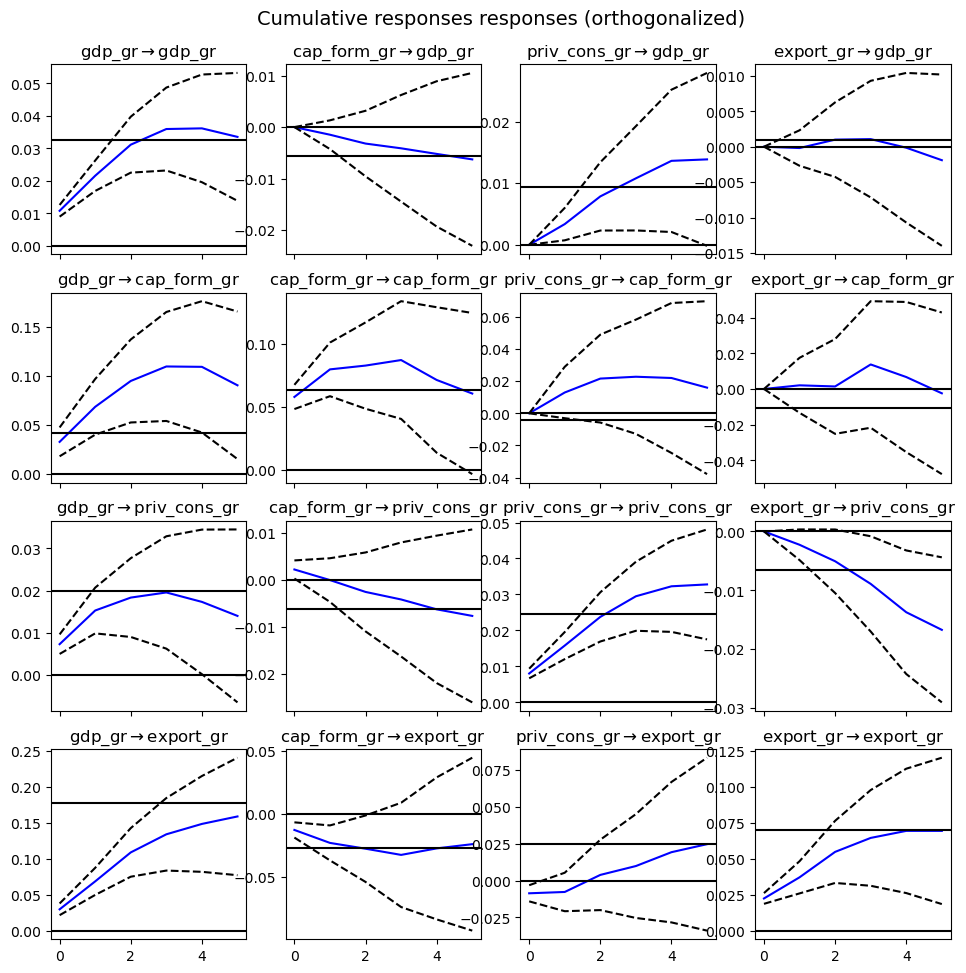

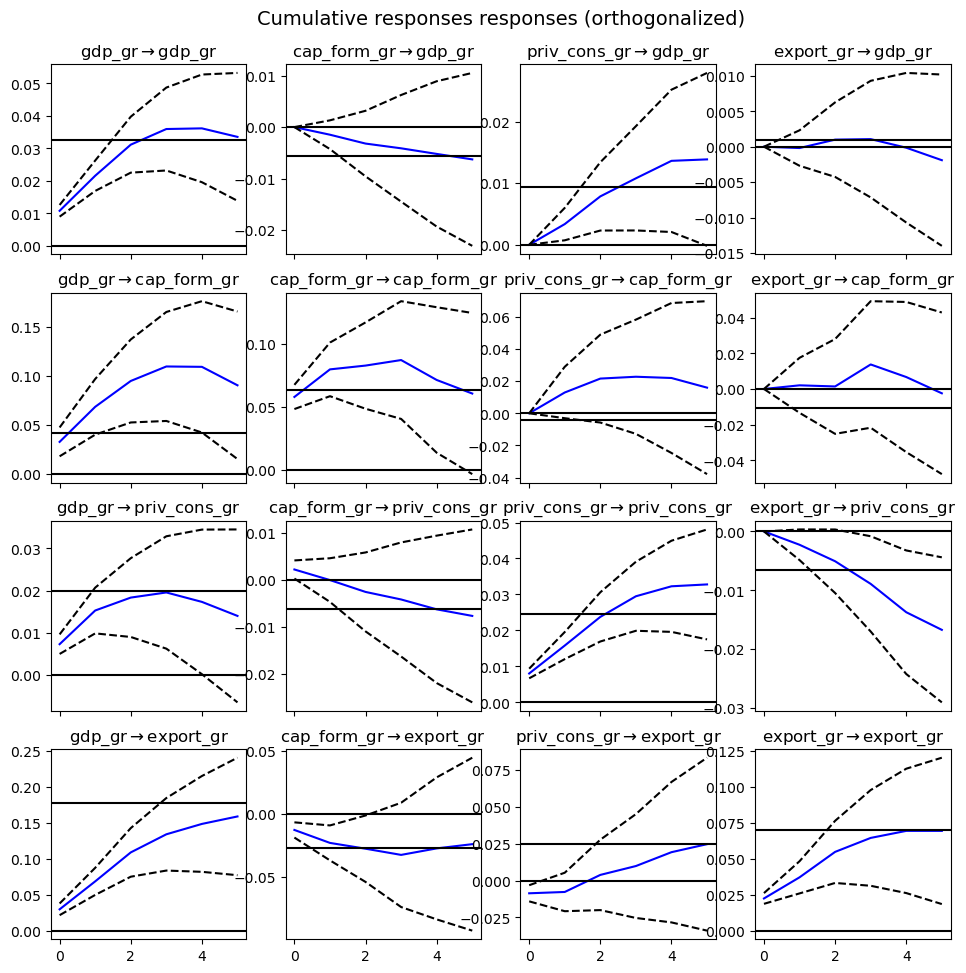

In [10]:
irf.plot_cum_effects(orth=True)

### Change the order of variables to GDP, private consumption, capital formation and export. Does this bring any noticeable changes in the results above?

ans : variable의 순서에 따라 orthogonalized impulse response function이 바뀐다

In [11]:
x2 =pd.DataFrame({'gdp_gr' : gdp_gr[4:],'priv_cons_gr':priv_cons_gr[4:],'cap_form_gr' : cap_form_gr[4:],'export_gr': export_gr[4:]})

In [12]:
# Impulse response plot
model = VAR(x2)
results1=model.fit(4,trend='c')

C:\Users\chris\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


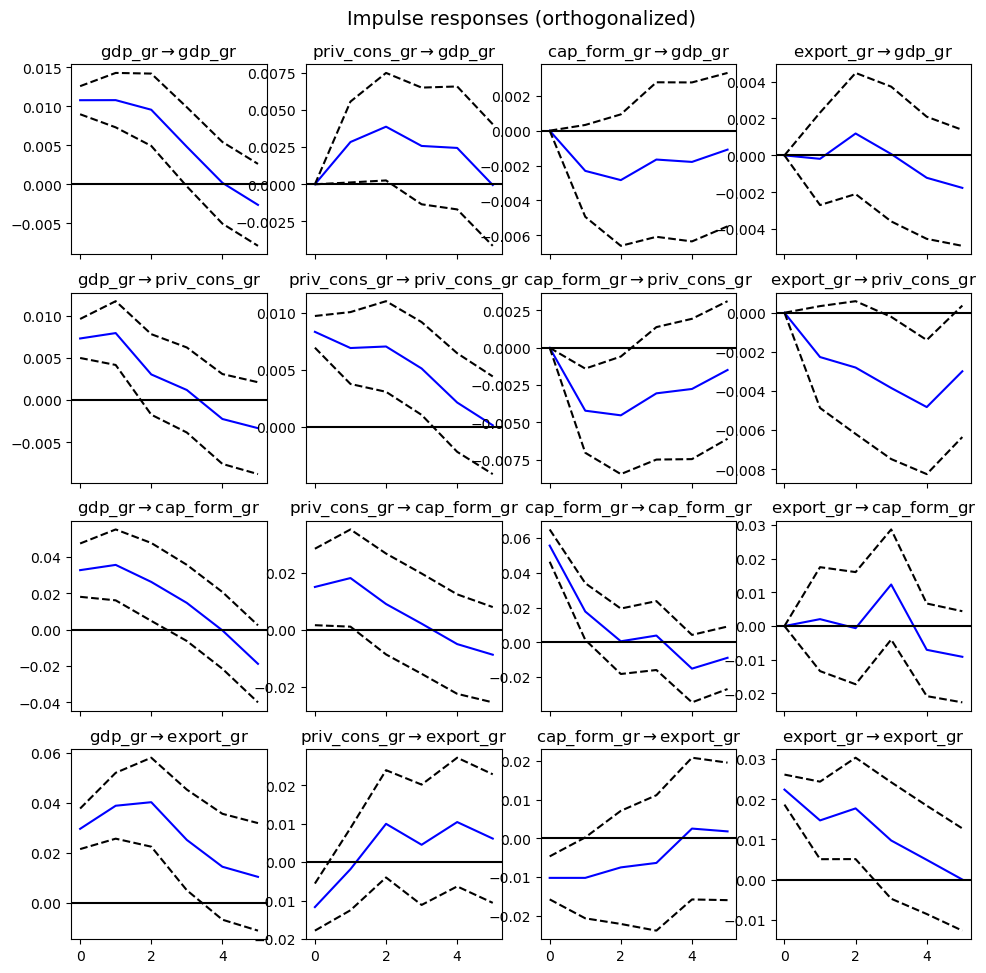

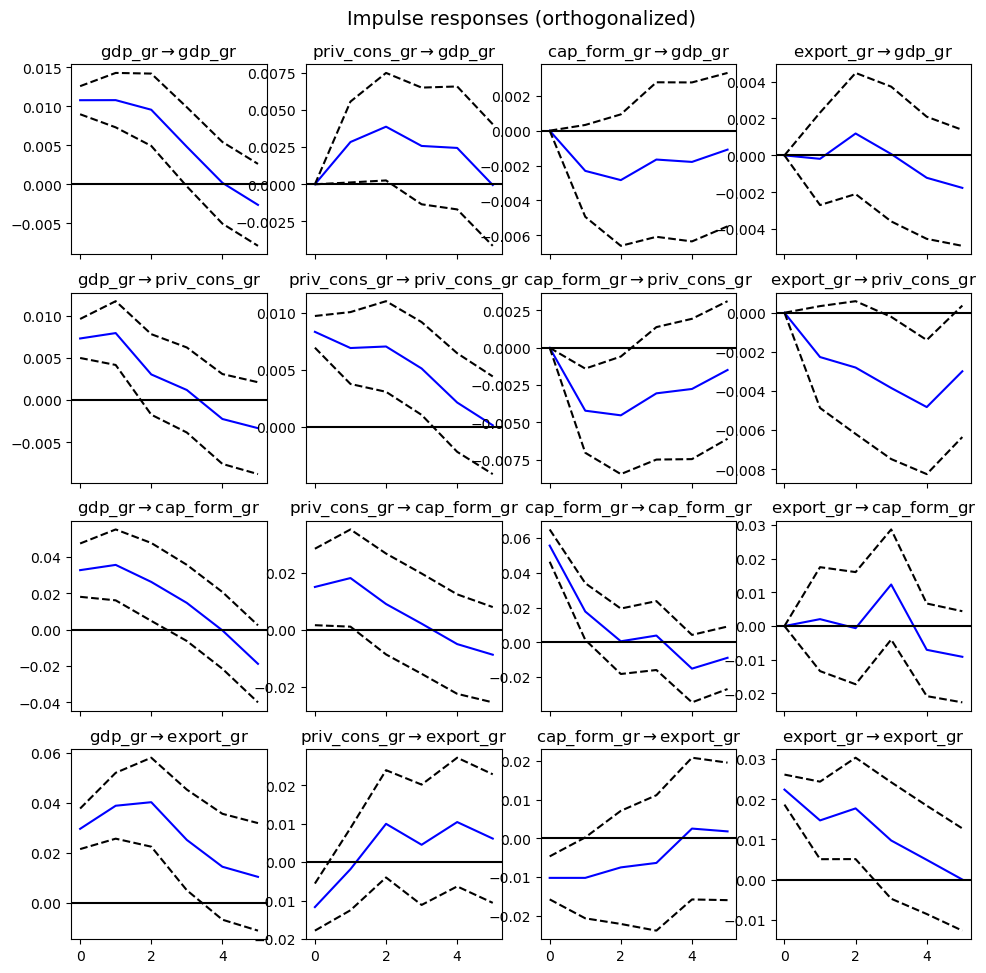

In [13]:
irf1 = results1.irf(5)
irf1.plot(orth=True)

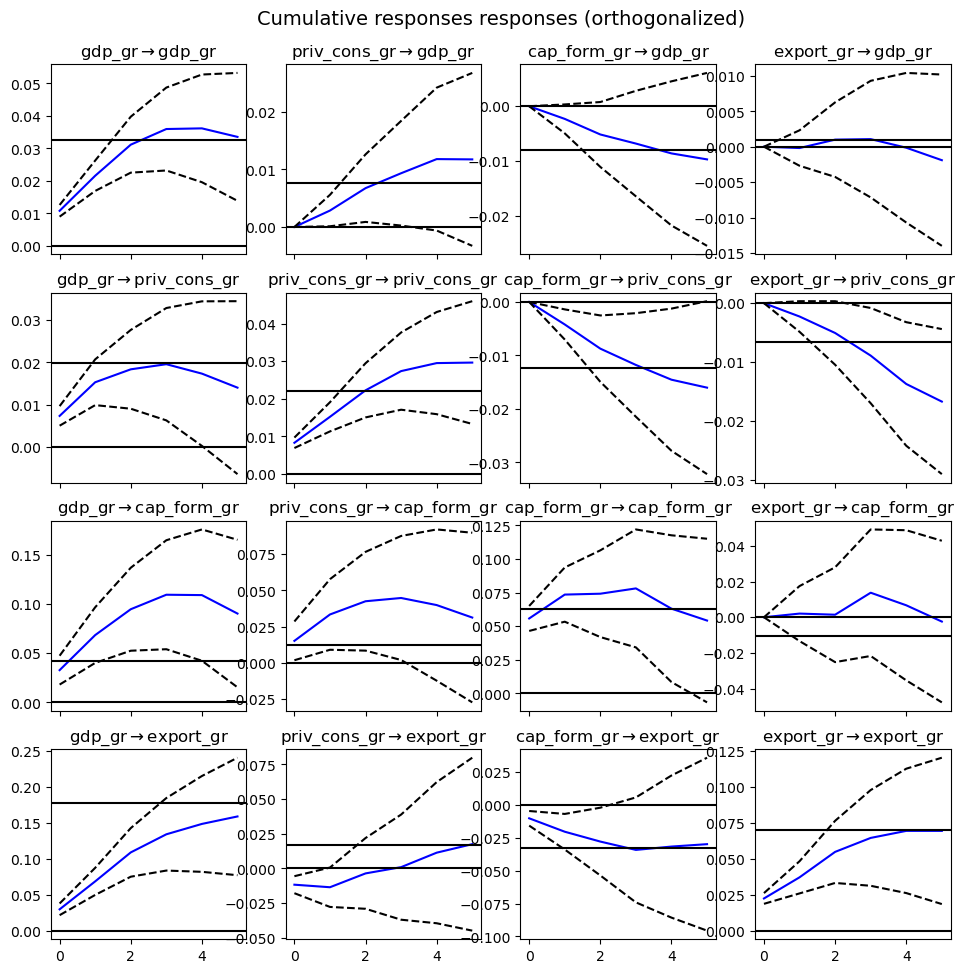

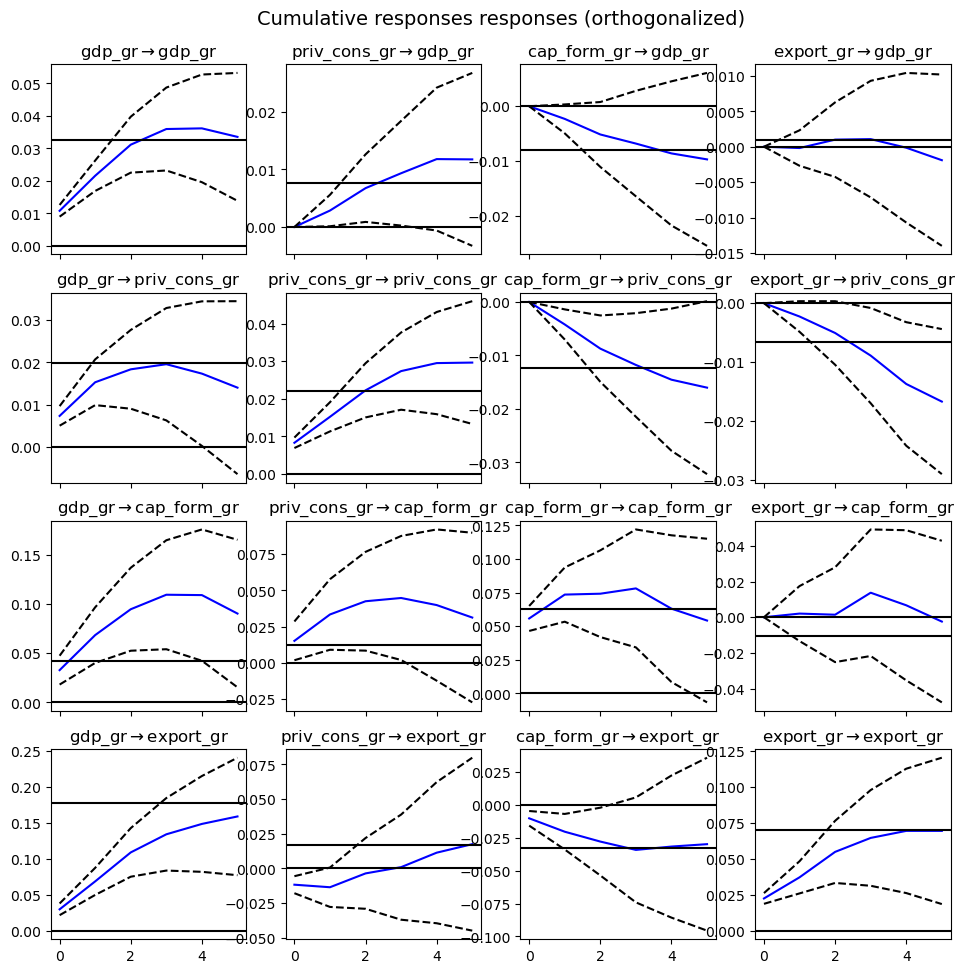

In [14]:
irf1.plot_cum_effects(orth=True)